In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [58]:
df=pd.read_csv('data/stud.csv')

In [59]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [61]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [62]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [63]:
X = preprocessor.fit_transform(X)

In [64]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [65]:
X.shape

(1000, 19)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mse)
    r2score=r2_score(true,predicted)
    return mae,rmse,r2score

In [68]:
from catboost import CatBoostRegressor

In [69]:
models ={
    "Liner Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "catBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]



In [70]:
for i in range(len(list((models)))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R^2 Score: {:.4f}".format(model_train_r2))

    print("-------------------------------------------------------------------")
    print('\n\nModel Performance for Test Set')
    print("-Root Mean Square Error :{:.4f} ".format(model_test_rmse))
    print('-Mean Aboslute Error:{:.4f}'.format(model_test_rmse))
    print('-R-squared score: {: .4f}\n'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

    

Liner Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3355
-Mean Absolute Error: 4.2831
-R^2 Score: 0.8737
-------------------------------------------------------------------


Model Performance for Test Set
-Root Mean Square Error :5.3422 
-Mean Aboslute Error:5.3422
-R-squared score:  0.8827



Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
-R^2 Score: 0.8071
-------------------------------------------------------------------


Model Performance for Test Set
-Root Mean Square Error :6.5197 
-Mean Aboslute Error:6.5197
-R-squared score:  0.8253



Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
-R^2 Score: 0.8743
-------------------------------------------------------------------


Model Performance for Test Set
-Root Mean Square Error :5.3904 
-Mean Aboslute Error:5.3904
-R-squared score:  0.8806



K-Neighbors Regressor
Model Performance for Tra

In [71]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_name','R^2_Score']).sort_values(by=['R^2_Score'],ascending=False)

,Model_name,R^2_Score
0,Liner Regression,0.882718
2,Ridge,0.880593
7,catBoosting Regressor,0.851632
5,Random Forest Regressor,0.847774
8,AdaBoost Regressor,0.843903
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.756204


In [72]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.27


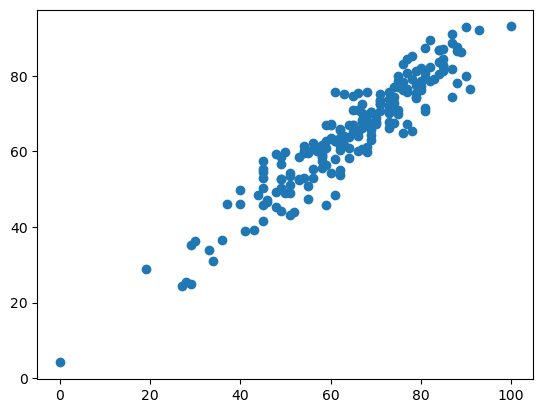

In [73]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

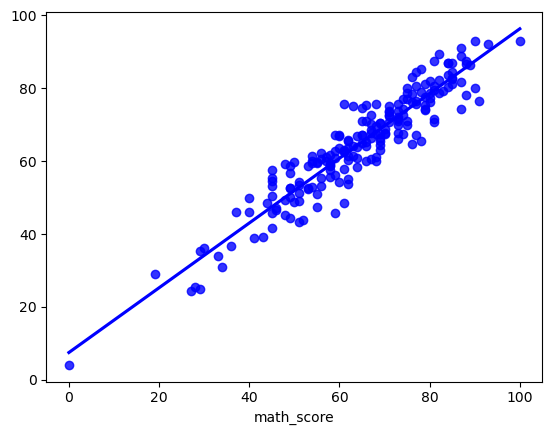

In [74]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='blue')

In [75]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [76]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.5000,14.5000
737,53,58.5625,-5.5625
740,80,77.4375,2.5625
660,74,77.1250,-3.1250
411,84,86.8750,-2.8750
...,...,...,...
408,52,43.9375,8.0625
332,62,61.3750,0.6250
208,74,67.5625,6.4375
613,65,67.0625,-2.0625
